In [1]:
import pandas as pd
from libs.parser import *

import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.ticker import FuncFormatter

import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm




In [2]:
golf_ball_dir = "/u/1/chenyang/benchmark_data/larger_matrix_exp/larger_mat_exp_result/2025-12-7/iteraion_mat_sz/golf_ball"
# old_dataset_dir = "/u/1/chenyang/benchmark_data/larger_matrix_exp/larger_mat_exp_result/2025-12-7/iteraion_mat_sz/old_dataset"

In [4]:
data_all = []
# for current_dir in [golf_ball_dir, old_dataset_dir]:
for fname in os.listdir(golf_ball_dir):
    if "Pardiso" in fname:
        solver = "Eigen::PardisoLDLT"
    elif "AMGCL" in fname:
        solver = "AMGCL"
    elif "Hypre" in fname:
        solver = "Hypre"
    log_path = os.path.join(golf_ball_dir, fname)
    data = parse_log_file(log_path, solver)
    data_all.extend(data)
    

In [5]:
print(data_all[0].keys())

dict_keys(['log_path', 'solver', 'bin_A', 'bin_b', 'mat_sz', 'nnz', 'density', 'sparsity', 'outer', 'inner', 'residual', 'clock_time', 'elapse_time', 'solver_tol', 'solver_maxiter', 'final_res_norm', 'num_iterations'])


In [7]:
grouped_data = []
for entry in data_all:
    solver = entry["solver"]
    mat_sz = entry["mat_sz"]
    elapse_time = entry["elapse_time"]
    outer = entry["outer"]
    if "num_iterations" in entry.keys():
        num_iterations = entry["num_iterations"]
    else:
        num_iterations = 0

    this_data = {
        "solver_name": solver,
        "mat_sz": mat_sz,
        "elapse_time": elapse_time,
        "num_iterations": num_iterations,
        "outer": outer
    }
    grouped_data.append(this_data)
    

In [8]:
df = pd.DataFrame(grouped_data)
df["time_per_iter"] = df["elapse_time"] / df["num_iterations"]


/tmp/ipykernel_3884098/226675988.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


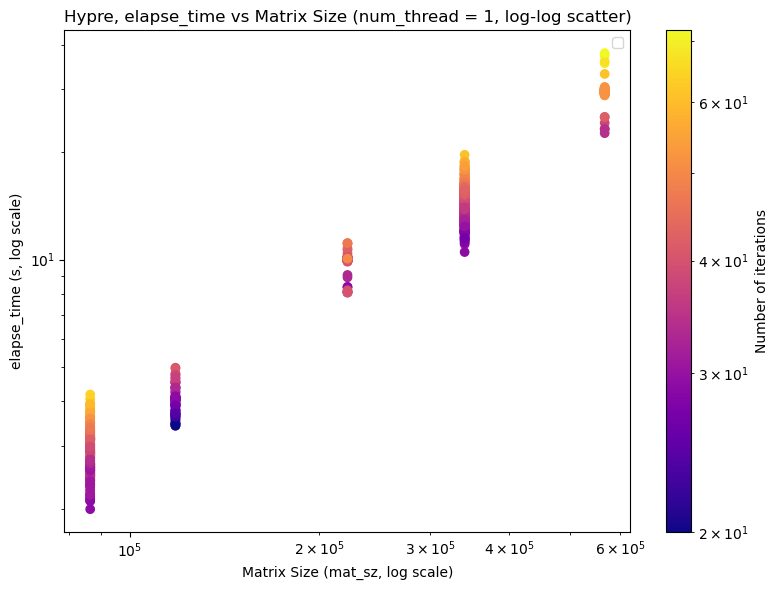

In [9]:

# Filter num_thread = 1

solver_name = "Hypre"
df1 = df[df["mat_sz"]>=1e4]
df1 = df1[df1["solver_name"]==solver_name]
plt.figure(figsize=(8, 6))

# Scatter for each solver
sc = plt.scatter(
    df1["mat_sz"],
    df1["elapse_time"],
    c=df1["num_iterations"],
    cmap="plasma",
    norm=LogNorm()
)


plt.xscale("log")
plt.yscale("log")

plt.xlabel("Matrix Size (mat_sz, log scale)")
plt.ylabel("elapse_time (s, log scale)")
plt.title(f"{solver_name}, elapse_time vs Matrix Size (num_thread = 1, log-log scatter)")
plt.colorbar(sc, label='Number of iterations')
plt.legend()
# plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipykernel_3884098/1956021915.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


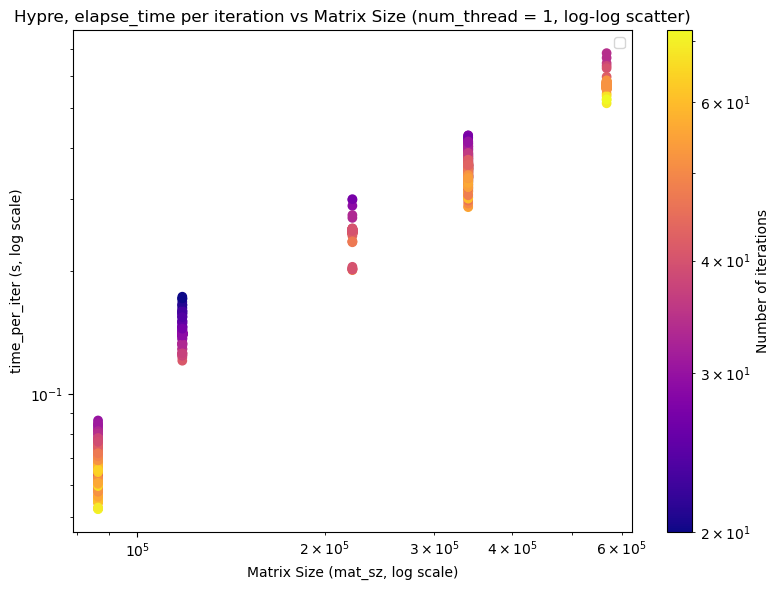

In [10]:

# Filter num_thread = 1

solver_name = "Hypre"
df1 = df[df["mat_sz"]>=1e4]
df1 = df1[df1["solver_name"]==solver_name]
plt.figure(figsize=(8, 6))

# Scatter for each solver
sc = plt.scatter(
    df1["mat_sz"],
    df1["time_per_iter"],
    c=df1["num_iterations"],
    cmap="plasma",
    norm=LogNorm()
)


plt.xscale("log")
plt.yscale("log")

plt.xlabel("Matrix Size (mat_sz, log scale)")
plt.ylabel("time_per_iter (s, log scale)")
plt.title(f"{solver_name}, elapse_time per iteration vs Matrix Size (num_thread = 1, log-log scatter)")
plt.colorbar(sc, label='Number of iterations')
plt.legend()
# plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipykernel_3884098/3952011218.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


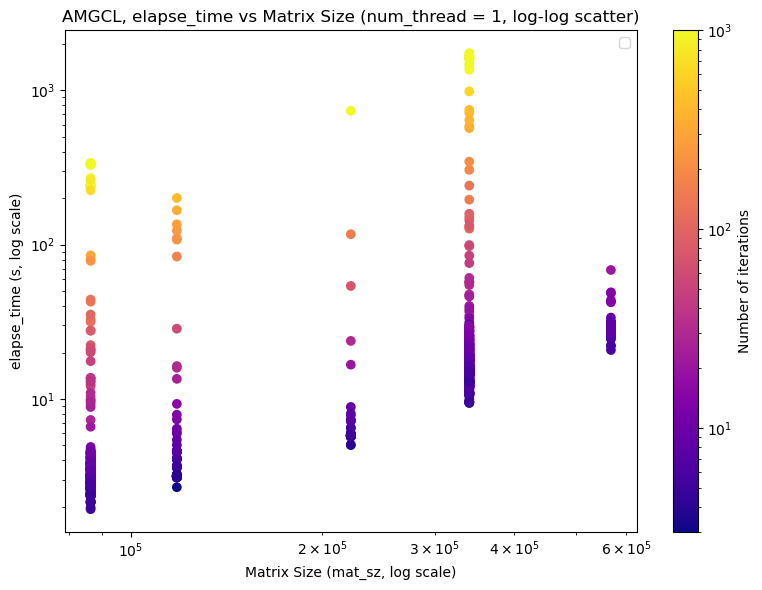

In [11]:

# Filter num_thread = 1

solver_name = "AMGCL"
df1 = df[df["mat_sz"]>=1e4]
df1 = df1[df1["solver_name"]==solver_name]
plt.figure(figsize=(8, 6))

# Scatter for each solver
sc = plt.scatter(
    df1["mat_sz"],
    df1["elapse_time"],
    c=df1["num_iterations"],
    cmap="plasma",
    norm=LogNorm()
)


plt.xscale("log")
plt.yscale("log")

plt.xlabel("Matrix Size (mat_sz, log scale)")
plt.ylabel("elapse_time (s, log scale)")
plt.title(f"{solver_name}, elapse_time vs Matrix Size (num_thread = 1, log-log scatter)")
plt.colorbar(sc, label='Number of iterations')
plt.legend()
# plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipykernel_3884098/1095402213.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


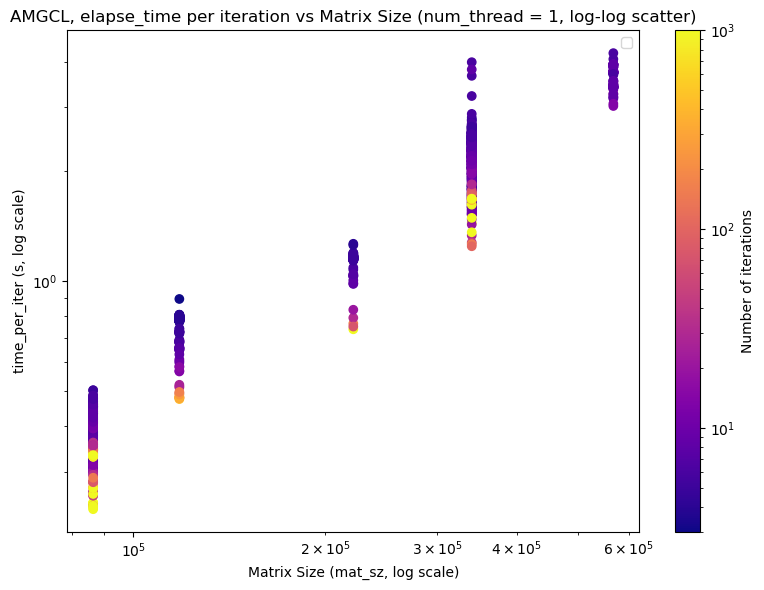

In [12]:

# Filter num_thread = 1

solver_name = "AMGCL"
df1 = df[df["mat_sz"]>=1e4]
df1 = df1[df1["solver_name"]==solver_name]
plt.figure(figsize=(8, 6))

# Scatter for each solver
sc = plt.scatter(
    df1["mat_sz"],
    df1["time_per_iter"],
    c=df1["num_iterations"],
    cmap="plasma",
    norm=LogNorm()
)


plt.xscale("log")
plt.yscale("log")

plt.xlabel("Matrix Size (mat_sz, log scale)")
plt.ylabel("time_per_iter (s, log scale)")
plt.title(f"{solver_name}, elapse_time per iteration vs Matrix Size (num_thread = 1, log-log scatter)")
plt.colorbar(sc, label='Number of iterations')
plt.legend()
# plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


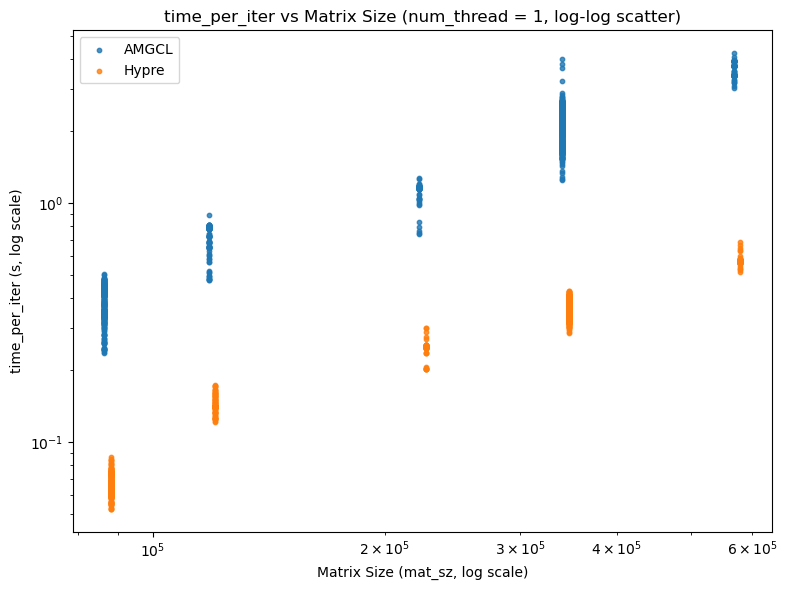

In [13]:
df1 = df[df["mat_sz"]>=1e4]

plt.figure(figsize=(8, 6))

offset = 1
# Scatter for each solver
for solver, sdf in df1.groupby("solver_name"):
    plt.scatter(
        sdf["mat_sz"]*offset,
        sdf["time_per_iter"],
        s=10,                # point size
        alpha=0.8,           # transparency
        label=solver
    )
    offset += .02

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Matrix Size (mat_sz, log scale)")
plt.ylabel("time_per_iter (s, log scale)")
plt.title("time_per_iter vs Matrix Size (num_thread = 1, log-log scatter)")
plt.legend()
# plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


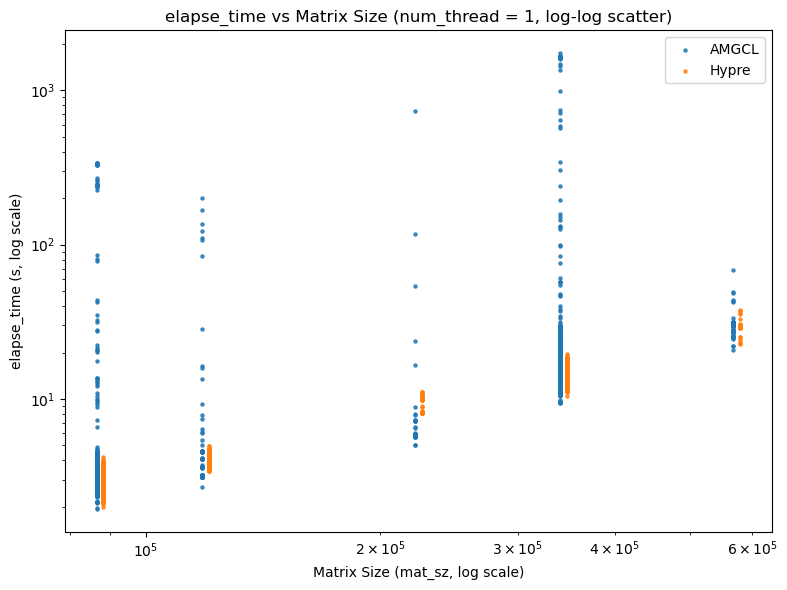

In [14]:
df1 = df[df["mat_sz"]>=1e4]

plt.figure(figsize=(8, 6))

offset = 1
# Scatter for each solver
for solver, sdf in df1.groupby("solver_name"):
    plt.scatter(
        sdf["mat_sz"]*offset,
        sdf["elapse_time"],
        s=5,                # point size
        alpha=0.8,           # transparency
        label=solver
    )
    offset += .02


plt.xscale("log")
plt.yscale("log")

plt.xlabel("Matrix Size (mat_sz, log scale)")
plt.ylabel("elapse_time (s, log scale)")
plt.title("elapse_time vs Matrix Size (num_thread = 1, log-log scatter)")
plt.legend()
# plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


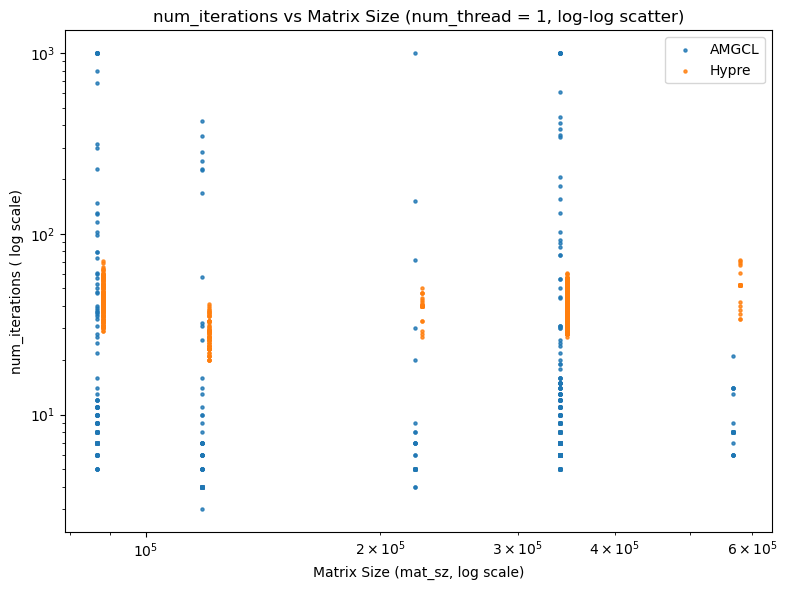

In [15]:
df1 = df[df["mat_sz"]>=1e4]

plt.figure(figsize=(8, 6))

offset = 1
# Scatter for each solver
for solver, sdf in df1.groupby("solver_name"):
    plt.scatter(
        sdf["mat_sz"]*offset,
        sdf["num_iterations"],
        s=5,                # point size
        alpha=0.8,           # transparency
        label=solver
    )
    offset += .02

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Matrix Size (mat_sz, log scale)")
plt.ylabel("num_iterations ( log scale)")
plt.title("num_iterations vs Matrix Size (num_thread = 1, log-log scatter)")
plt.legend()
# plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [17]:
print(df["mat_sz"].unique())

[567270 118128  86499 339975 221556]


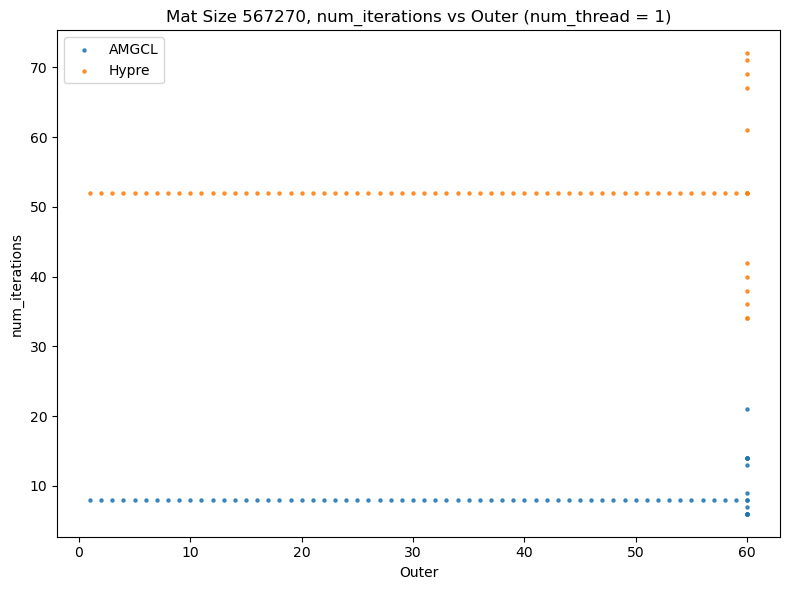

In [19]:

mat_sz = df["mat_sz"].unique()[0]
df1 = df[df["mat_sz"]>=1e4]
df1 = df1[df1["mat_sz"]==mat_sz]



plt.figure(figsize=(8, 6))

offset = 0
# Scatter for each solver
for solver, sdf in df1.groupby("solver_name"):
    plt.scatter(
        sdf["outer"]+offset,
        sdf["num_iterations"],
        s=5,                # point size
        alpha=0.8,           # transparency
        label=solver
    )
#     offset += .02

# plt.xscale("log")
# plt.yscale("log")

plt.xlabel("Outer")
plt.ylabel("num_iterations")
plt.title(f"Mat Size {mat_sz}, num_iterations vs Outer (num_thread = 1)")
plt.legend()
# plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


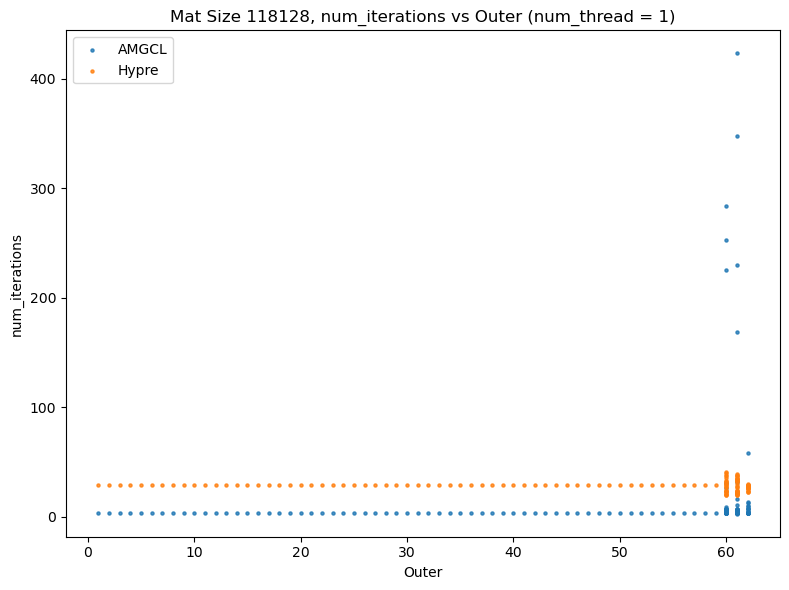

In [20]:

mat_sz = df["mat_sz"].unique()[1]
df1 = df[df["mat_sz"]>=1e4]
df1 = df1[df1["mat_sz"]==mat_sz]



plt.figure(figsize=(8, 6))

offset = 0
# Scatter for each solver
for solver, sdf in df1.groupby("solver_name"):
    plt.scatter(
        sdf["outer"]+offset,
        sdf["num_iterations"],
        s=5,                # point size
        alpha=0.8,           # transparency
        label=solver
    )
#     offset += .02

# plt.xscale("log")
# plt.yscale("log")

plt.xlabel("Outer")
plt.ylabel("num_iterations")
plt.title(f"Mat Size {mat_sz}, num_iterations vs Outer (num_thread = 1)")
plt.legend()
# plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


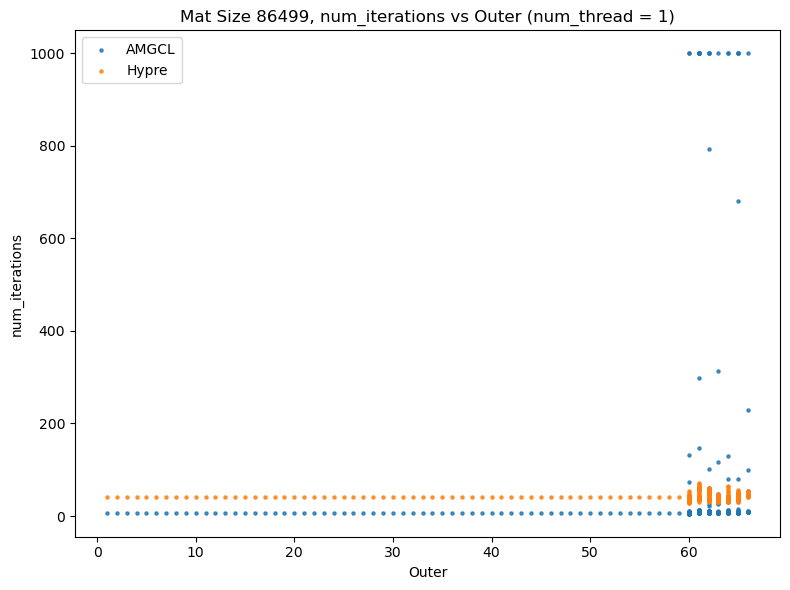

In [21]:

mat_sz = df["mat_sz"].unique()[2]
df1 = df[df["mat_sz"]>=1e4]
df1 = df1[df1["mat_sz"]==mat_sz]



plt.figure(figsize=(8, 6))

offset = 0
# Scatter for each solver
for solver, sdf in df1.groupby("solver_name"):
    plt.scatter(
        sdf["outer"]+offset,
        sdf["num_iterations"],
        s=5,                # point size
        alpha=0.8,           # transparency
        label=solver
    )
#     offset += .02

# plt.xscale("log")
# plt.yscale("log")

plt.xlabel("Outer")
plt.ylabel("num_iterations")
plt.title(f"Mat Size {mat_sz}, num_iterations vs Outer (num_thread = 1)")
plt.legend()
# plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


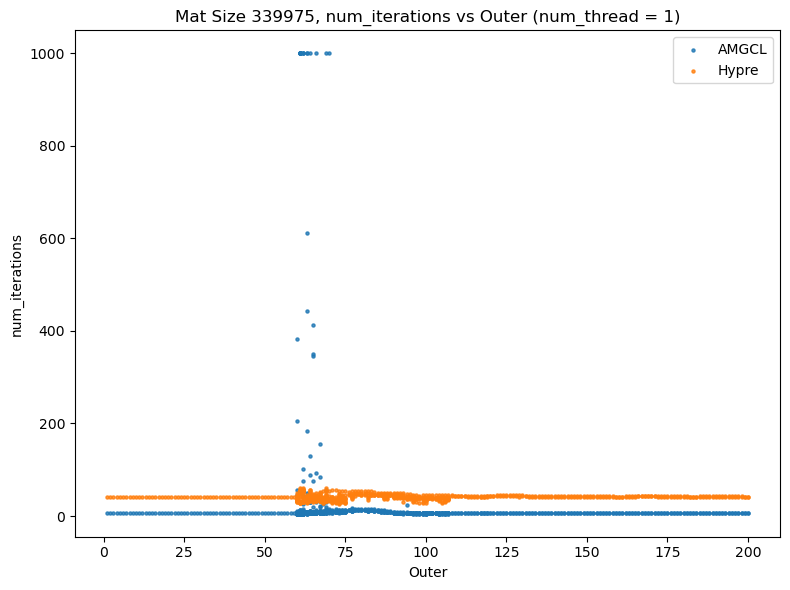

In [22]:

mat_sz = df["mat_sz"].unique()[3]
df1 = df[df["mat_sz"]>=1e4]
df1 = df1[df1["mat_sz"]==mat_sz]



plt.figure(figsize=(8, 6))

offset = 0
# Scatter for each solver
for solver, sdf in df1.groupby("solver_name"):
    plt.scatter(
        sdf["outer"]+offset,
        sdf["num_iterations"],
        s=5,                # point size
        alpha=0.8,           # transparency
        label=solver
    )
#     offset += .02

# plt.xscale("log")
# plt.yscale("log")

plt.xlabel("Outer")
plt.ylabel("num_iterations")
plt.title(f"Mat Size {mat_sz}, num_iterations vs Outer (num_thread = 1)")
plt.legend()
# plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


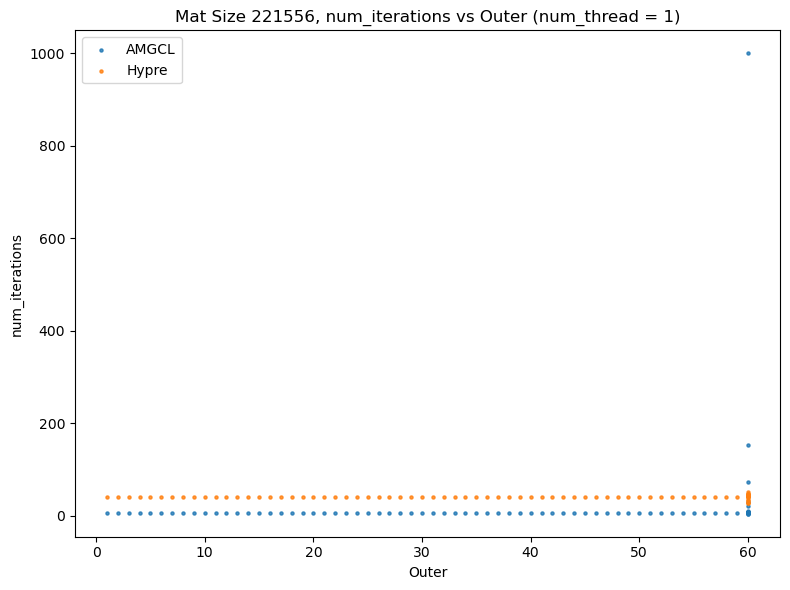

In [23]:

mat_sz = df["mat_sz"].unique()[4]
df1 = df[df["mat_sz"]>=1e4]
df1 = df1[df1["mat_sz"]==mat_sz]



plt.figure(figsize=(8, 6))

offset = 0
# Scatter for each solver
for solver, sdf in df1.groupby("solver_name"):
    plt.scatter(
        sdf["outer"]+offset,
        sdf["num_iterations"],
        s=5,                # point size
        alpha=0.8,           # transparency
        label=solver
    )
#     offset += .02

# plt.xscale("log")
# plt.yscale("log")

plt.xlabel("Outer")
plt.ylabel("num_iterations")
plt.title(f"Mat Size {mat_sz}, num_iterations vs Outer (num_thread = 1)")
plt.legend()
# plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
